In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

plt.style.use('ggplot')

### Quick Note: most plots don't have titles because I used the same function to calculate data and plot for all graphs. If it is big problem, I can change it :)

# Task 1

C:\Users\kagiencz\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


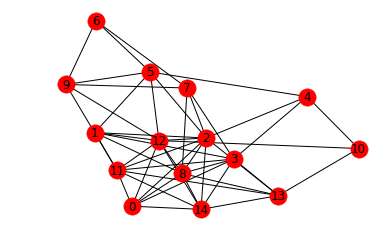

In [16]:
def erdos_renyi_random_graph(N = 10, L = 20):
    #sanitize input
    if L > N**2:
        raise ValueError('More edges than vertices')
    G = nx.Graph()
    all_possible_edges = create_all_edges(N)
    G.add_nodes_from(range(N))
    
    #choose random edge and add it to a graph
    for i in range(0, L):
        elem = random.choice(all_possible_edges)
        G.add_edge(elem[0], elem[1])
    return G
    
#all possible edges
def create_all_edges(N = 20):
    edges = list()
    for i in range(0,N):
        for ii in range(0,N):
            edges.append([i,ii])
    return edges
    
plt.subplot(111)
nx.draw(erdos_renyi_random_graph(15, 70), with_labels=True)
plt.show()

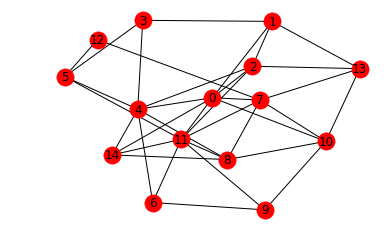

In [17]:
def gilbert_graph(N = 10, p = 0.1):
    #sanitize input
    if p>1 or p<0:
        raise ValueError('That is probability you fool')
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for i in range(N):
        for ii in range(N):
            if random.random() < p:
                G.add_edge(i,ii)
    return G

plt.subplot(111)
nx.draw(gilbert_graph(15, 0.2), with_labels=True)
plt.show()

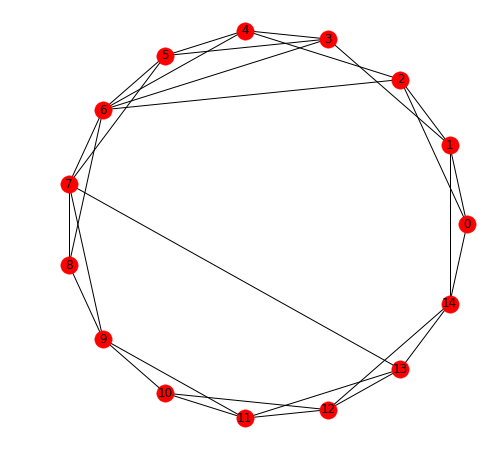

In [18]:
def watts_strogatz_graph(N = 10, k = 4, β = 0.1):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    #link with k neighbours
    for i in range(N):
        for ii in range(N):
            if i!=ii:
                m = np.mod(np.abs(i-ii), N - k/2)
                if m <= k/2:
                    G.add_edge(i,ii)    
    #rewire edges
    for i in range(N):
        for ii in range(i+1, i+int(np.floor(k/2))+1):
            if random.random() < β:
                b = i
                while b==i or G.has_edge(i,b):
                    b = random.choice(range(N))
                G.remove_edge(i,np.mod(ii, N))
                G.add_edge(i,b)
    return G

plt.figure(figsize=(8,8))
plt.subplot(111)
nx.draw_circular(watts_strogatz_graph(15, 4, 0.1), with_labels=True)
plt.show()

7.2
8.133333333333333
4.0


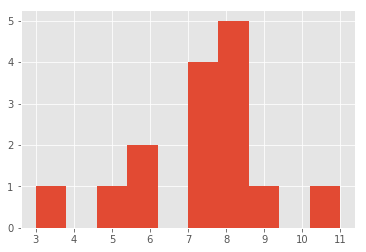

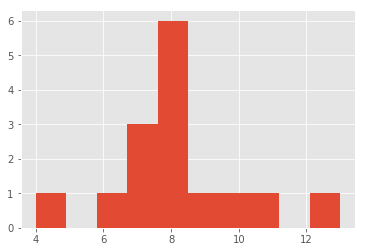

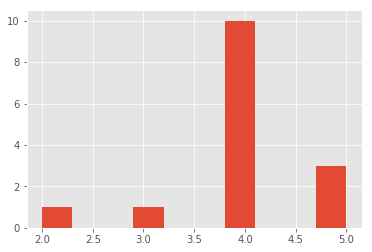

In [19]:
erg = erdos_renyi_random_graph(15, 70)
gg = gilbert_graph(15, 0.3)
wsg = watts_strogatz_graph(15,4,0.1)

def plot_degree_dist(G, bins=10):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins)
    plt.show()
    
def mean_degree(G):
    degrees = [G.degree(n) for n in G.nodes()]
    return sum(degrees)/float(len(degrees))

print(mean_degree(erg))
print(mean_degree(gg))
print(mean_degree(wsg))

plot_degree_dist(erg)
plot_degree_dist(gg)
plot_degree_dist(wsg)

0.431005291005291
0.5436411736411736
0.4755555555555555


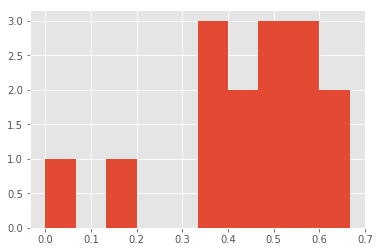

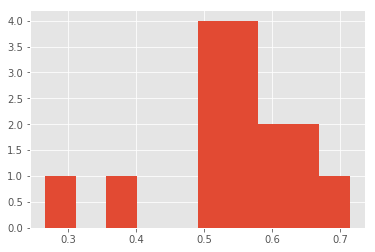

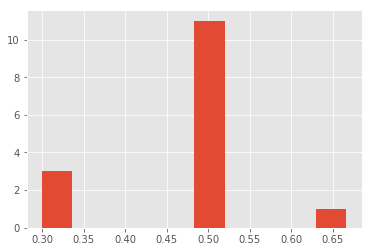

In [6]:
def plot_clustering_dist(G, bins=10):
    clusters = [nx.clustering(G,n) for n in G.nodes()]
    plt.hist(clusters, bins)
    plt.show()

print(nx.average_clustering(erg))
print(nx.average_clustering(gg))
print(nx.average_clustering(wsg))

plot_clustering_dist(erg)
plot_clustering_dist(gg)
plot_clustering_dist(wsg)

In [7]:
print(nx.average_shortest_path_length(erg))
print(nx.average_shortest_path_length(gg))
print(nx.average_shortest_path_length(wsg))

print(nx.diameter(erg))
print(nx.diameter(gg))
print(nx.diameter(wsg))

1.723809523809524
1.4476190476190476
2.1714285714285713
4
2
4


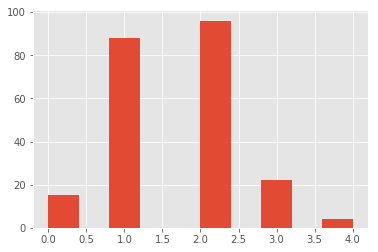

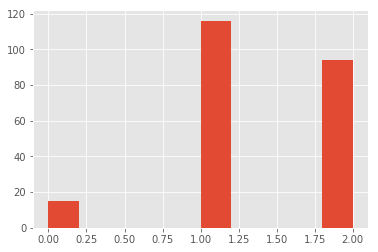

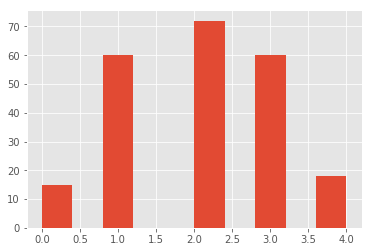

In [8]:
# prepare data - don't care about the beginning vertex, just count letgths
def plot_distribution_of_shortest_paths(G):
    shortest_paths = list()
    for path in nx.all_pairs_shortest_path_length(G):
        for i in range(len(path[1])):
            shortest_paths.append(path[1][i])
    plt.hist(shortest_paths)
    plt.show()
      
plot_distribution_of_shortest_paths(erg)
plot_distribution_of_shortest_paths(gg)
plot_distribution_of_shortest_paths(wsg)

# Task 2

In [31]:
# for each data_point calculate average shortest path and average clustering coefficient
# then normalize it
avg_path_lens = list()
avg_clustering_coeffs = list()
data_points = [0.0001, 0.001, 0.004, 0.007, 0.01, 0.05, 0.1, 0.3, 0.5, 1]
for i in data_points:
    gr = nx.watts_strogatz_graph(n=1000, k=4, p=i)
    avg_path_lens.append(nx.average_shortest_path_length(gr))
    avg_clustering_coeffs.append(nx.average_clustering(gr))
    
normalized_avg_path_length = [x/avg_path_lens[0] for x in avg_path_lens]
normalized_avg_clustering_coeffs = [x/avg_clustering_coeffs[0] for x in avg_clustering_coeffs]
print(normalized_avg_path_length)
print(normalized_avg_clustering_coeffs)

[1.0, 1.0, 0.7529979081836328, 0.27665234331337324, 0.2680456846307386, 0.09850213173652694, 0.06947877045908184, 0.049584031936127745, 0.044964359281437126, 0.042617772455089825]
[1.0, 1.0, 0.9937999999999999, 0.9831999999999999, 0.9815333333333336, 0.8782666666666668, 0.7324857142857144, 0.3540825396825393, 0.16916984126984141, 0.005595238095238096]


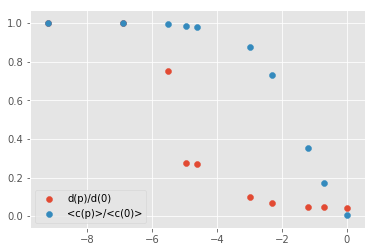

In [35]:
# plot
pa = plt.scatter(np.log(data_points), normalized_avg_path_length)
cl = plt.scatter(np.log(data_points), normalized_avg_clustering_coeffs)
plt.legend((pa, cl), ("d(p)/d(0)", "<c(p)>/<c(0)>"))
plt.show()

In [36]:
# same as above but for k=8
avg_path_lens = list()
avg_clustering_coeffs = list()
data_points = [0.0001, 0.001, 0.004, 0.007, 0.01, 0.05, 0.1, 0.3, 0.5, 1]
for i in data_points:
    gr = nx.watts_strogatz_graph(n=1000, k=8, p=i)
    avg_path_lens.append(nx.average_shortest_path_length(gr))
    avg_clustering_coeffs.append(nx.average_clustering(gr))
    
normalized_avg_path_length = [x/avg_path_lens[0] for x in avg_path_lens]
normalized_avg_clustering_coeffs = [x/avg_clustering_coeffs[0] for x in avg_clustering_coeffs]
print(normalized_avg_path_length)
print(normalized_avg_clustering_coeffs)

[1.0, 0.7339547992047714, 0.3023893757455268, 0.24650392047713718, 0.18093989662027835, 0.09979206361829025, 0.08079058449304174, 0.06387196819085486, 0.058714592445328034, 0.056654759443339954]
[1.0, 0.9975555555555563, 0.9894320987654307, 0.984500000000001, 0.9732148148148124, 0.8739514029180672, 0.7395456790123441, 0.36194466891133487, 0.13073837520504192, 0.012159289475956089]


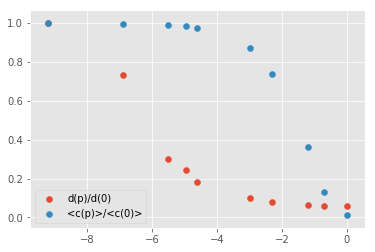

In [37]:
pa = plt.scatter(np.log(data_points), normalized_avg_path_length)
cl = plt.scatter(np.log(data_points), normalized_avg_clustering_coeffs)
plt.legend((pa, cl), ("d(p)/d(0)", "<c(p)>/<c(0)>"))
plt.show()

In [42]:
# Compare with theoretical values
# I think there might be misspelling in the Problem sheet - theoretical formulas are the same ?
N = [10, 50, 100, 300, 500, 700, 1000, 1500, 2000]
avg_diameters = list()
avg_paths = list()
d_theoretical = list()
for i in range(len(N)):
    wsg = nx.watts_strogatz_graph(n=N[i], k=4, p=0.1)
    avg_diameters.append(nx.diameter(wsg))
    avg_paths.append(nx.average_shortest_path_length(wsg))
    d_theoretical.append(np.log(N[i])/np.log(4))
    
print(avg_diameters)
print(avg_paths)
print(d_theoretical)

[3, 10, 9, 14, 16, 16, 18, 20, 20]
[1.6666666666666667, 4.091428571428572, 4.907878787878788, 6.926889632107024, 7.880400801603207, 8.264042509707746, 8.867051051051051, 9.70078274405159, 9.755107553776888]
[1.6609640474436813, 2.821928094887362, 3.3219280948873626, 4.114409345247941, 4.4828921423310435, 4.7256055559161645, 4.9828921423310435, 5.2753733926916215, 5.4828921423310435]


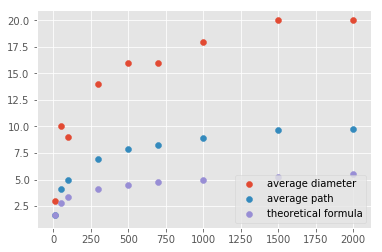

In [44]:
dia = plt.scatter(N, avg_diameters)
pat = plt.scatter(N, avg_paths)
d_th = plt.scatter(N, d_theoretical)
plt.legend((dia, pat, d_th), ("average diameter", "average path", "theoretical formula"))
plt.show()

# Task 3

C:\Users\kagiencz\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


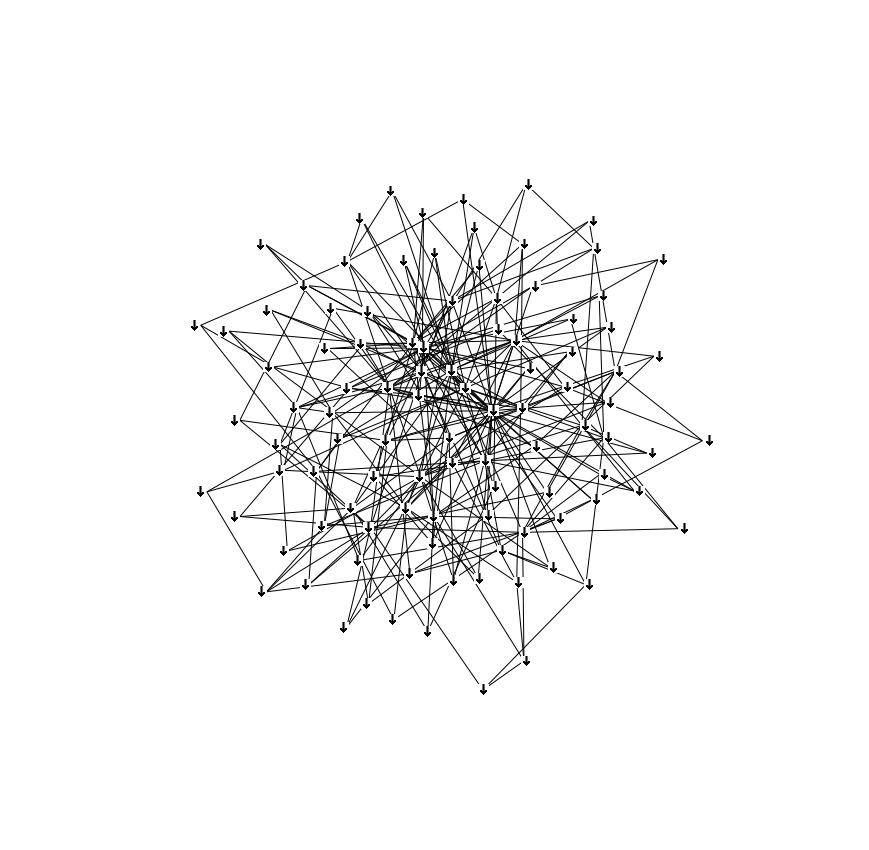

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# Create Barabasi graph, rewrite it to empty graph, with picture this time
img = Image.open('arrow.jpg')
G = nx.barabasi_albert_graph(100, 3)
H = nx.Graph()
nodes = list(G.nodes())
for i in range(len(nodes)):
    H.add_node(nodes[i], image=img)
    
H.add_edges_from(G.edges())

# Prepare layout and figure
pos = nx.spring_layout(H)
fig=plt.figure(figsize=(15,15))
ax=plt.subplot(111)
ax.set_aspect('equal')
nx.draw_networkx_edges(H,pos,ax=ax)

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

trans=ax.transData.transform
trans2=fig.transFigure.inverted().transform

# Plot nodes
piesize=0.01 
p2=piesize/2.0
for n in H:
    xx,yy=trans(pos[n]) # figure coordinates
    xa,ya=trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-p2,ya-p2, piesize, piesize])
    a.set_aspect('equal')
    a.imshow(H.node[n]['image'])
    a.axis('off')
ax.axis('off')
plt.show()

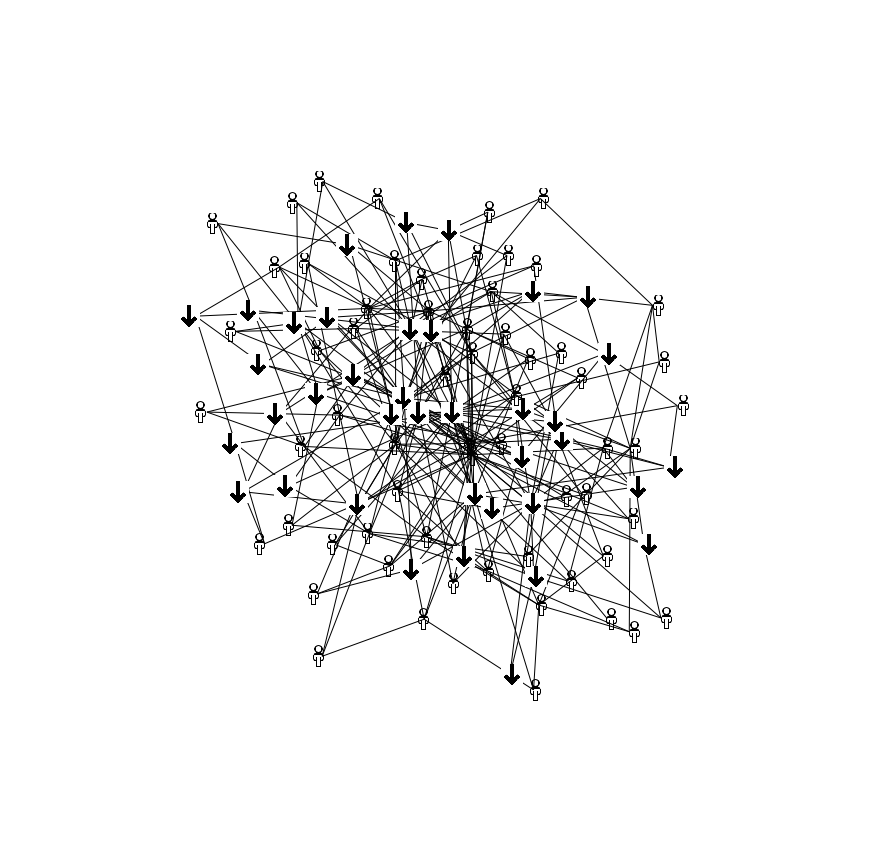

In [9]:
img1 = Image.open('arrow.jpg')
img2 = Image.open('person.png')
G = nx.barabasi_albert_graph(100, 3)
H = nx.Graph()
nodes = list(G.nodes())
 
for vertex in G.nodes():
    if G.degree(vertex) % 2 == 0:
        H.add_node(vertex, image=img1)
    else: 
        H.add_node(vertex, image=img2)

H.add_edges_from(G.edges())

# Prepare layout and figure
pos = nx.spring_layout(H)
fig=plt.figure(figsize=(15,15))
ax=plt.subplot(111)
ax.set_aspect('equal')
nx.draw_networkx_edges(H,pos,ax=ax)

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

trans=ax.transData.transform
trans2=fig.transFigure.inverted().transform

# Plot nodes
piesize=0.02
p2=piesize/2.0
for n in H:
    xx,yy=trans(pos[n]) # figure coordinates
    xa,ya=trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-p2,ya-p2, piesize, piesize])
    a.set_aspect('equal')
    a.imshow(H.node[n]['image'])
    a.axis('off')
ax.axis('off')
plt.show()

0.07200000000000001 0.036000000000000004
0.04 0.02
0.092 0.046
0.092 0.046
0.02 0.01
0.032 0.016
0.06 0.03
0.024 0.012
0.036000000000000004 0.018000000000000002
0.092 0.046
0.07200000000000001 0.036000000000000004
0.06 0.03
0.048 0.024
0.06 0.03
0.024 0.012
0.027999999999999997 0.013999999999999999
0.04 0.02
0.024 0.012
0.055999999999999994 0.027999999999999997
0.024 0.012
0.024 0.012
0.02 0.01
0.016 0.008
0.012 0.006
0.012 0.006
0.012 0.006
0.036000000000000004 0.018000000000000002
0.016 0.008
0.012 0.006
0.036000000000000004 0.018000000000000002
0.06 0.03
0.016 0.008
0.027999999999999997 0.013999999999999999
0.016 0.008
0.02 0.01
0.012 0.006
0.027999999999999997 0.013999999999999999
0.02 0.01
0.012 0.006
0.016 0.008
0.032 0.016
0.02 0.01
0.016 0.008
0.016 0.008
0.016 0.008
0.012 0.006
0.016 0.008
0.016 0.008
0.036000000000000004 0.018000000000000002
0.027999999999999997 0.013999999999999999
0.024 0.012
0.016 0.008
0.012 0.006
0.016 0.008
0.024 0.012
0.012 0.006
0.012 0.006
0.016 0.00

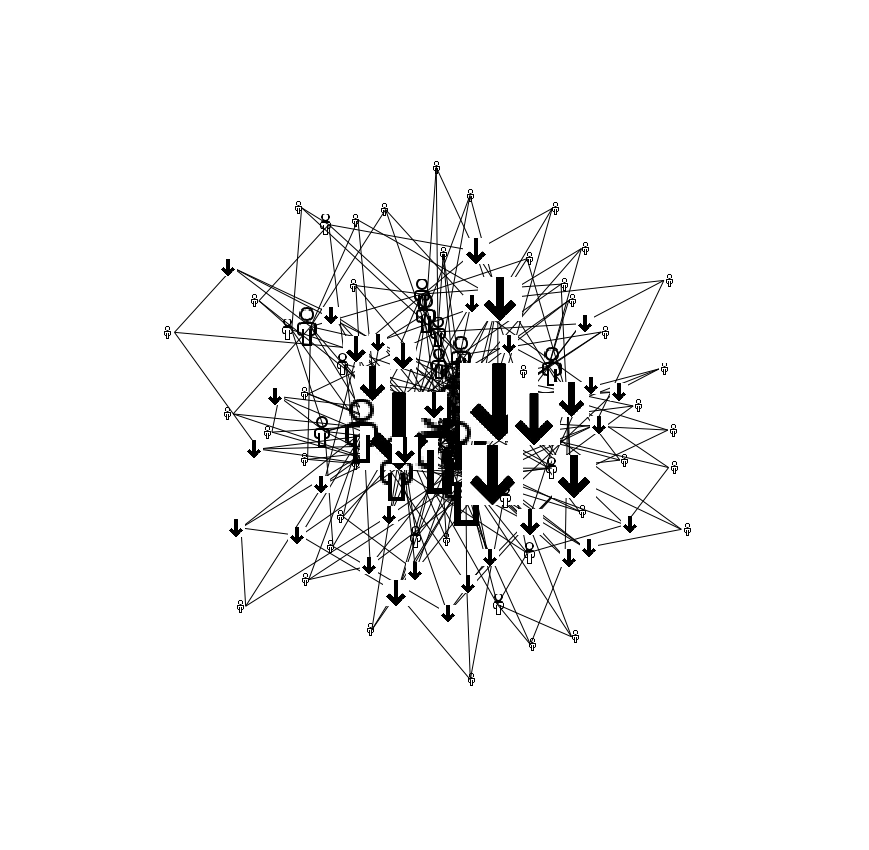

In [7]:
img1 = Image.open('arrow.jpg')
img2 = Image.open('person.png')
G = nx.barabasi_albert_graph(100, 3)
H = nx.Graph()
nodes = list(G.nodes())
 
for vertex in G.nodes():
    if G.degree(vertex) % 2 == 0:
        H.add_node(vertex, image=img1)
    else: 
        H.add_node(vertex, image=img2)

H.add_edges_from(G.edges())

# Prepare layout and figure
pos = nx.spring_layout(H)
fig=plt.figure(figsize=(15,15))
ax=plt.subplot(111)
ax.set_aspect('equal')
nx.draw_networkx_edges(H,pos,ax=ax)

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

trans=ax.transData.transform
trans2=fig.transFigure.inverted().transform

# Plot nodes
piesize=0.04 
p2=piesize/2.0
for n in H:
    scale = H.degree(n) / 10
    piesize = piesize*scale
    p2 = p2*scale
    xx,yy=trans(pos[n]) # figure coordinates
    xa,ya=trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-p2,ya-p2, piesize, piesize])
    a.set_aspect('equal')
    a.imshow(H.node[n]['image'])
    a.axis('off')
    piesize=0.04 
    p2=piesize/2.0
ax.axis('off')
plt.show()

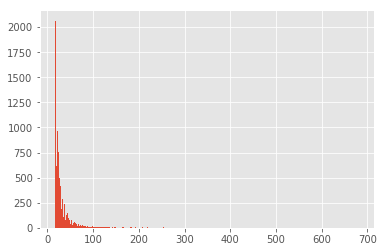

In [30]:
# 10^7? Not on my computer
plot_degree_dist(nx.barabasi_albert_graph(10000, 16), 400)

In [31]:
from scipy.stats import norm
barabasi = nx.barabasi_albert_graph(10000, 30)
path = nx.shortest_path(barabasi, 10, 5000)
norm.pdf(path)

array([7.69459863e-23, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

# Task 4

In [20]:
# read graph
fb_graph = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)
print(nx.info(fb_graph))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


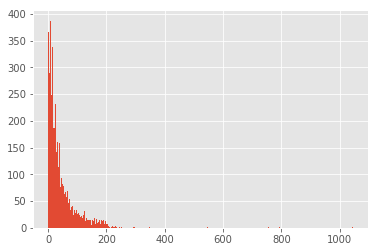

43.69101262688784


In [21]:
# use functions from task 1 to do the plots
plot_degree_dist(fb_graph, 300)

print(mean_degree(fb_graph))

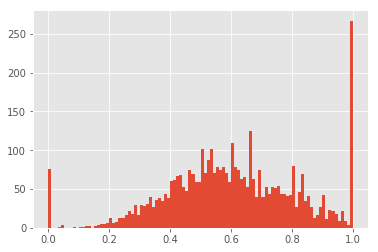

0.6055467186200876


In [22]:
plot_clustering_dist(fb_graph, 100)

print(nx.average_clustering(fb_graph))

In [42]:
print(nx.average_shortest_path_length(fb_graph))
print(nx.diameter(fb_graph))

3.6925068496963913
8


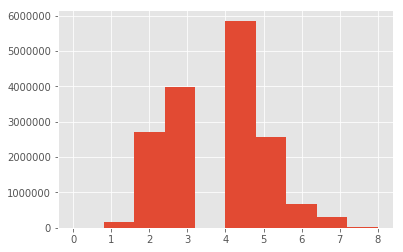

In [43]:
# I mean, it looks strange, but it's probably taking values from 1 to 8 and just displaying awfully
plot_distribution_of_shortest_paths(fb_graph)